In [95]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Srikar\.cache\kagglehub\datasets\uciml\pima-indians-diabetes-database\versions\1


In [96]:
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(f"{path}" + "/diabetes.csv", sep=",", names=col_names, skiprows=1)

In [97]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [98]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [99]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'skin']

In [100]:
import matplotlib.pyplot as plt
import numpy as np

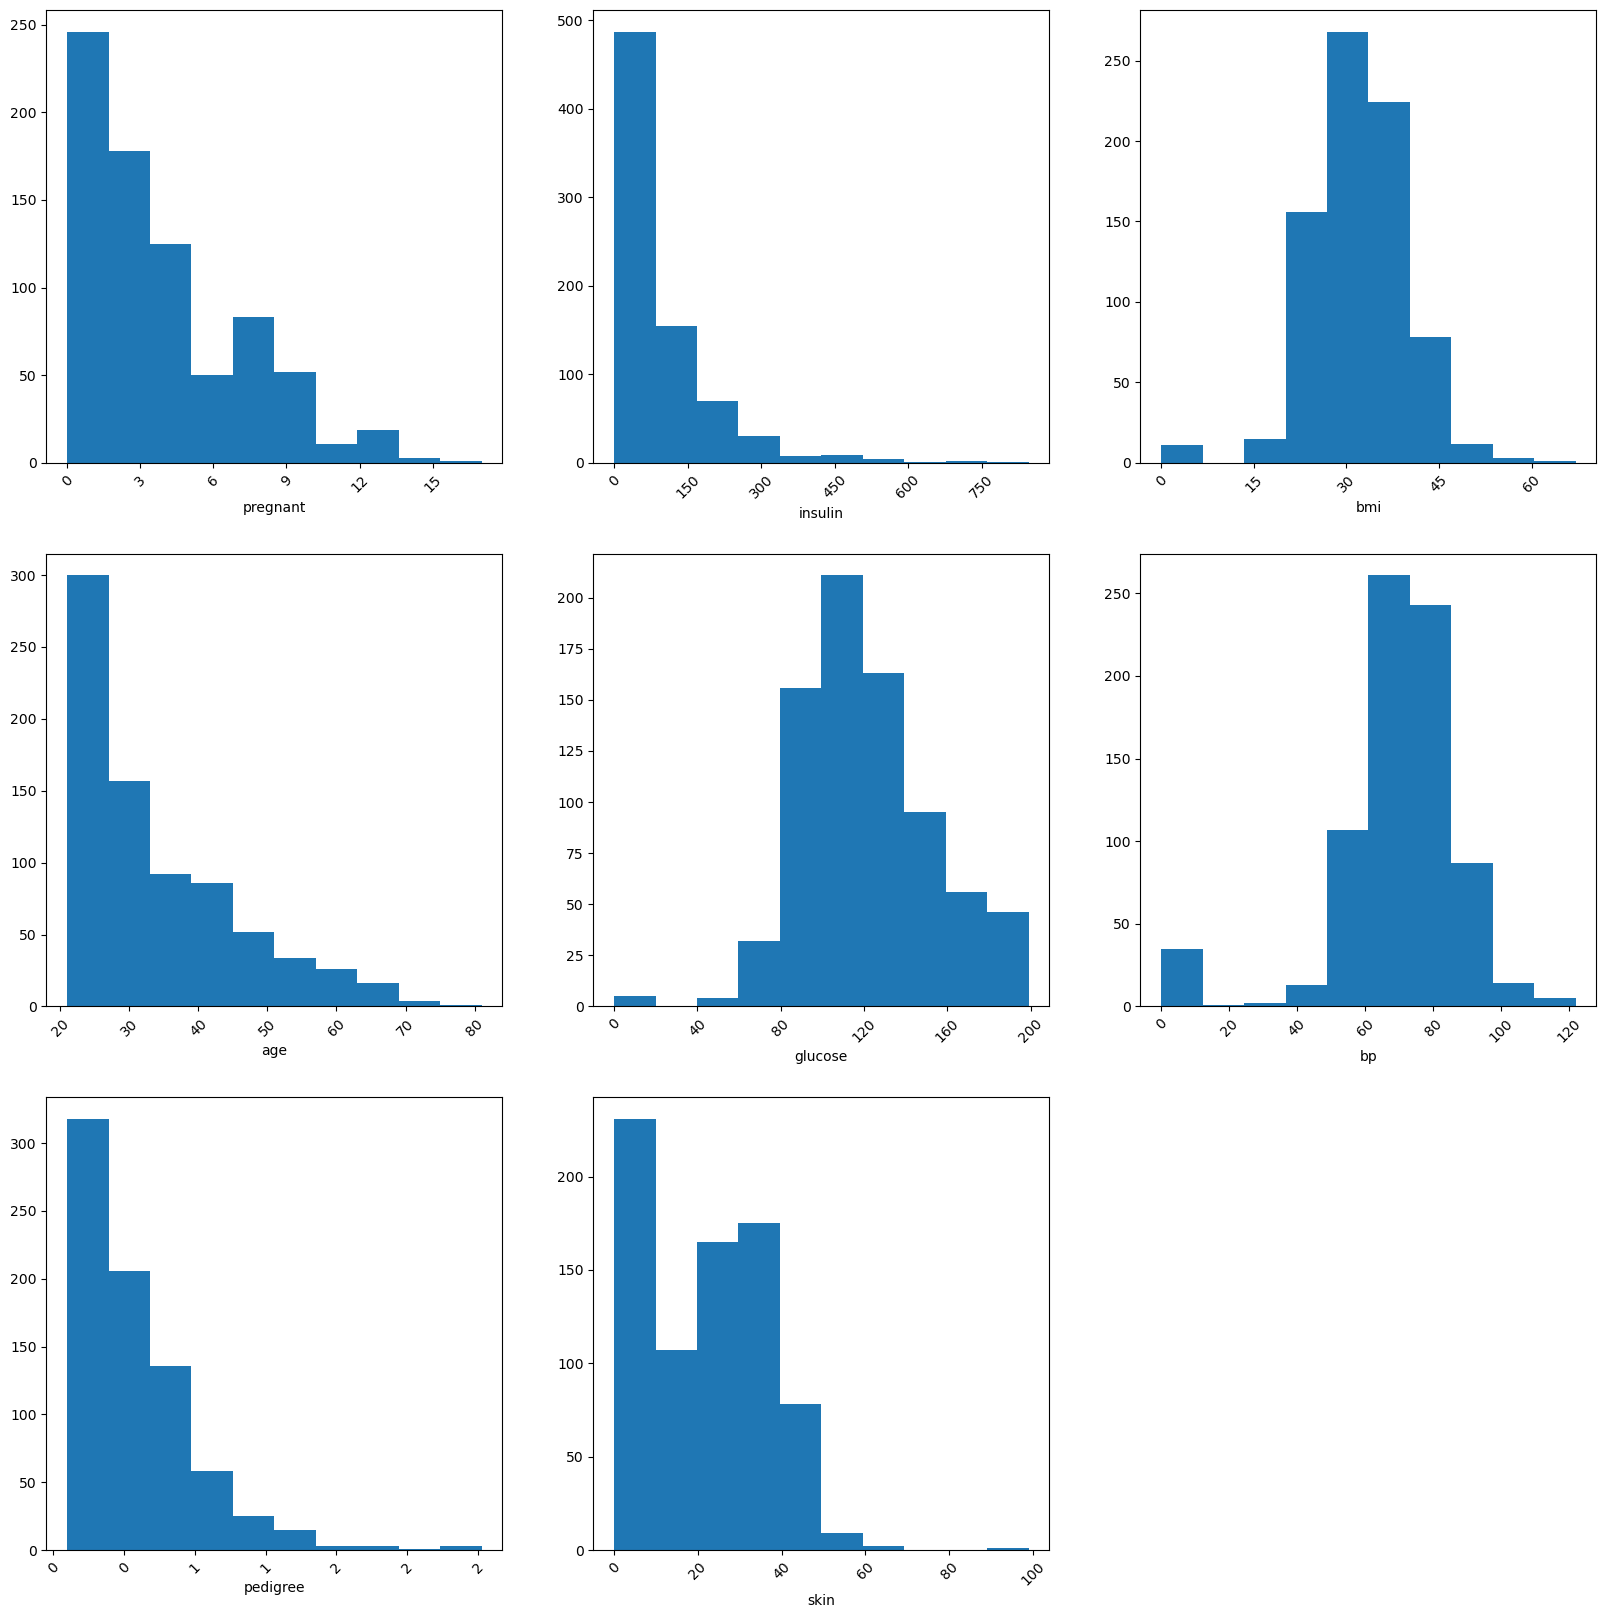

In [101]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.ravel()
for n, col in enumerate(feature_cols):
    ax = axes[n]
    ax.hist(pima[col])
    ax.set_xlabel(col)
    ax.xaxis.set_major_locator(plt.MaxNLocator(7))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}'))
        
    ax.tick_params(axis='x', rotation=45)

plt.delaxes(plt.subplot(3, 3, 9))
plt.show()

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

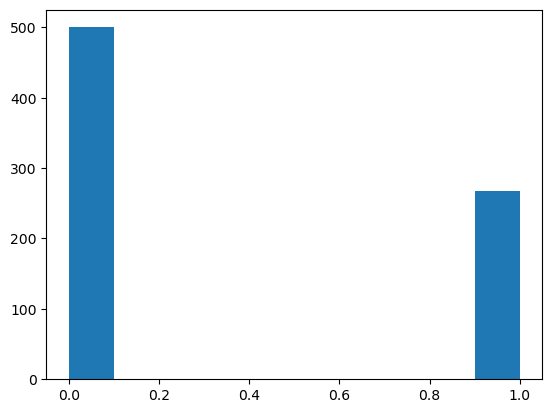

In [102]:
plt.hist(pima['label'])

In [103]:
# Find columns with zero counts
data_nan_count = pima[feature_cols].isna().sum()
print(data_nan_count)

pregnant    0
insulin     0
bmi         0
age         0
glucose     0
bp          0
pedigree    0
skin        0
dtype: int64


In [104]:
# There are null values in the data. Filling them with nan
pima[feature_cols] = pima[feature_cols].replace(0, np.NaN)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


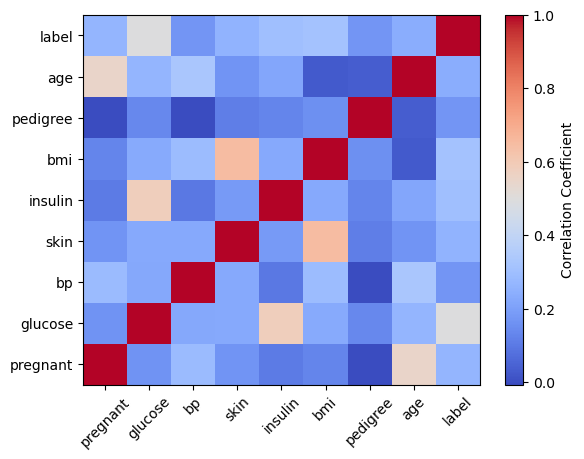

In [ ]:
# How to fill Nan, draw a corelation matrix or a heatmap and observe values and fill
co_matrix = pima.corr()
im = plt.imshow(co_matrix, cmap='coolwarm', aspect='auto', origin='lower')
plt.colorbar(im, label='Correlation Coefficient')
plt.xticks(np.arange(len(col_names)), col_names, rotation=45)
plt.yticks(np.arange(len(col_names)), col_names)
plt.show()

In [107]:
# Filling  zeroes as of insulin columns with the median
def median(var):
    temp = pima[pima[var].notnull()]
    temp = temp[[var, 'label']].groupby(['label'])[[var]].median().reset_index()
    return temp


zero_fill_cols = ['insulin', 'bmi', 'bp', 'glucose'] # ignoring skin as number of zeroes are more, cannot be normalised and correlation is not great.
for col in zero_fill_cols:
    med = median(col)
    pima.loc[(pima['label']==0)&(pima[col].isnull()), col] = med[col][0]
    pima.loc[(pima['label']==1)&(pima[col].isnull()), col] = med[col][1]

In [2]:
feature_cols = feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

In [ ]:
class LogisticRegression:
    def __init__(self):
        self.w = np.zeros(len(feature_cols))
        self.b = 0.4
    
    def _sigmod(z):
        return 1/(1 + np.exp(-z))

    def forward(self, X):
        y_pred = np.dot(X, self.w) + self.b
        y_pred = self._sigmod(y_pred)
        return y_pred

    def loss(self, y_pred, y_expected):
        epsilon = 1e-9 # used to aoid log 0 cases
        y1 = y_expected * np.log(y_pred + epsilon)
        y2 = (1-y_expected)* np.log(1-y_pred + epsilon)
        return -np.mean(y1+y2)
    
    
    def backward(self, y, X, y_pred, lr = 0.01):
        dz = y_pred - y
        dw = (1/len(X)) * np.dot(X,dz)
        db = (1/len(X)) * np.sum(dz)
        self.w -= lr * dw
        self.b -= lr * db
        return

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
import numpy as np

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    def fit(self, X, y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y


        for i in range(self.iterations):
            self.updateWeights()
        return self
    
    def updateWeights(self):
        sigmoid = 1 / ( 1 + np.exp(-(self.X.dot( self.W ) + self.b)))

        tmp = (sigmoid - self.y.T)
        tmp = np.reshape(tmp, self.m)
        dW = np.dot( self.X.T, tmp ) / self.m
        db = np.sum( tmp ) / self.m
          
        # update weights     
        self.W = self.W - self.learning_rate * dW     
        self.b = self.b - self.learning_rate * db 
          
        return self